In [12]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
    

Populating the interactive namespace from numpy and matplotlib


In [13]:
#df = pd.read_csv("PUI2017/201706-citibike-tripdata.csv")
df=pd.read_csv("/home/cusp/nj935/PUI2017/201706-citibike-tripdata.csv")

## Idea
Men make longer rides than women do.

## Null hypothesis
Mean ride length for men is equal to or smaller than mean ride length for women.

## Alternative hypothesis
Mean ride length for men is larger than mean ride length for women. 

## Significance level
p-0.05

In [14]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1


In [15]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [16]:
df['tripduration'][1]

1103

In [17]:
df.head()
#g_count=df['gender'].value_counts("1")
gender_av=df.groupby('gender').mean()



In [18]:
gender_av

,tripduration
gender,
0,1986.205084
1,929.261206
2,1026.176602


In [19]:
print("*** Citibike average trip length in June 2017 ***\n\n")
print("Male: %.2f seconds\n"%gender_av['tripduration'][1])
print("Female: %.2f seconds\n"%gender_av['tripduration'][2])
print("Hint: I think the hypothesis may get rejected.")


*** Citibike average trip length in June 2017 ***


Male: 929.26 seconds

Female: 1026.18 seconds

Hint: I think the hypothesis may get rejected.


In [20]:
#pl.figure(figsize=(5, 5))
?plt.bar
#pl.title('Histogram of mean values for normal random samples', fontsize=14)
#pl.xlabel('sample mean', fontsize = 14)
#pl.ylabel('N', fontsize = 14)

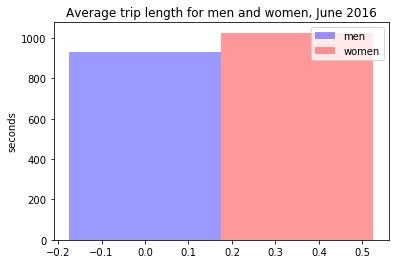

In [60]:
fig, ax = pl.subplots()

ind = np.arange(1)
bar_width = 0.35
categories=("Men","Women")

bar1=pl.bar(ind,gender_av['tripduration'][1], bar_width, alpha=0.4, color="b", label="men")
bar2=pl.bar(ind+bar_width,gender_av['tripduration'][2], bar_width, alpha=0.4, color="r", label='women')


plt.ylabel('seconds')
plt.legend()
plt.title('Average trip length for men and women, June 2016')